### PES inference of H3 from quantum surrogate circuit using particle number conserving ansatz

#### <u>Code to reproduce the result in Fig. 8</u>

- 6 qubits system for H3 molecule
- PQC with D=4

In [1]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
from ase.units import Bohr
%matplotlib inline

### Set calculation conditions (Do not change)

In [2]:
# Do not change the following parameters

num_qubits = 6 # number of qubits, n_qubits
reps_pqc = 4   # Depth of PQC, D
reps = 2       # number of block PQC layer of HQCNN

### Make Datasets

In [3]:
def make_testdata(xmin, xmax, data_num):

    X_test = []
    _r = np.linspace(xmin * Bohr, xmax * Bohr, data_num)

    for i in range(data_num):
        X_test.append([_r[i], 0, 0])

    return X_test

In [4]:
xmin = 1.0
xmax = 3.0
num_test_data = 30
R=4

X_test = make_testdata(xmin,xmax,num_test_data)

### Number of train data

In [5]:
alpha=5

### Define surrogate circuit model

In [6]:
from sub.pqc import QNNcircuit_PNC_H3, QNNcircuit_HE_H3
from sub.utils import get_qubit_hamiltonian_of_H3
from sub.utils import expval

In [7]:
# PES inference using our proposed quantum surrogate circuit (QSC)
def infer_energy_PNC(opt_params, X_test, R):
    global reps_pqc, reps

    energy = []
    for i in tqdm(range(len(X_test))):
        qc0 = QNNcircuit_PNC_H3(num_qubits, X_test[i], reps_pqc, reps, opt_params)
        hamil = get_qubit_hamiltonian_of_H3(X_test[i][0],R)[0]
        energy.append(expval(hamil, qc0))
        
    return energy

In [8]:
# PES inference using the previous Xia's model (HQCNN)
def infer_energy_HE(opt_params, X_test, R):
    global reps_pqc, reps

    energy = []
    for i in tqdm(range(len(X_test))):
        qc0 = QNNcircuit_HE_H3(num_qubits, X_test[i], reps_pqc, reps, opt_params, weight=np.pi)
        hamil = get_qubit_hamiltonian_of_H3(X_test[i][0],R)[0]
        energy.append(expval(hamil, qc0))
        
    return energy

In [9]:
#load preoptimized parameters
filename1 = './params/H3_QSC_R_4_alpha_5.pickle'
filename2 = './params/H3_HQCNN_R_4_alpha_5.pickle'   

with open(filename1, 'rb') as f1:
    opt_params1 = pickle.load(f1)
with open(filename2, 'rb') as f2:
    opt_params2 = pickle.load(f2)
    
f1.close()
f2.close()

In [10]:
print(len(opt_params1))
print(opt_params1)

38
[ 0.48350434  0.87612962  0.65563953  0.71224778  0.06570418  0.52103082
  0.81360258  0.46654     0.76150624  0.93526443  0.4791417   0.12666416
  0.92255609  0.20896765  0.75569425  0.46329089  0.56869534  0.87601312
  0.40651497  0.0991835   0.1434128  -0.04954353  0.32005047  0.41016027
  1.69026091  1.21268908  1.7643777  -0.50530714  1.33993386  0.77800583
 -1.30614469  1.52192064 -0.25495401  0.99081219  0.10631594 -1.82821639
 -0.04245922  1.24070041]


In [11]:
print(len(opt_params2))
print(opt_params2)

48
[ 1.14720651e+00 -9.10834892e-01  1.28958937e+00  1.19745163e+00
  1.97446700e+00  1.24050501e+00  4.65614662e-01  2.28031086e-01
 -1.92371331e-01  8.01756197e-01  3.48324664e-01 -2.56107578e-01
  6.06395600e-01 -1.78135184e-01  8.38405492e-01  1.12437013e+00
 -5.07531335e-02 -8.77359124e-01  9.79018587e-01  8.26821065e-01
  1.62666363e+00  8.10277708e-01 -6.43564135e-01  1.23319245e+00
  1.59083544e-02 -1.13602754e-01  3.06491177e-03 -6.19940501e-04
  1.41335196e+00 -1.99081268e-01  2.20649358e-03 -6.70091757e-04
  1.57193291e+00  1.88229633e-03  3.72527769e-01  4.97695752e-01
 -3.07711458e-04 -2.26761874e-01  2.08856566e+00  2.11643294e+00
  1.57106398e+00  1.85549609e-01 -3.37845875e-03 -2.41902393e-01
  1.57041100e+00 -3.31866077e-02 -1.56677889e-03 -5.29261928e-01]


/home/nishida/software/anaconda3/lib/python3.8/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


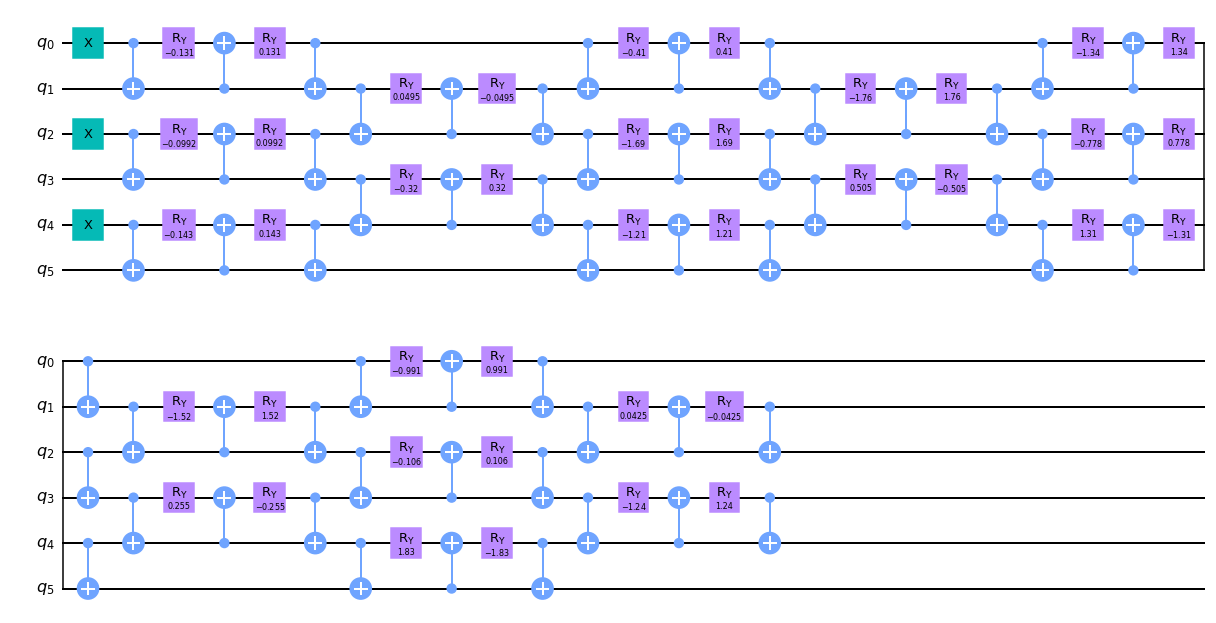

In [12]:
# example of QSC
qc = QNNcircuit_PNC_H3(num_qubits, X_test[0], reps_pqc, reps, opt_params1)
qc.draw('mpl')

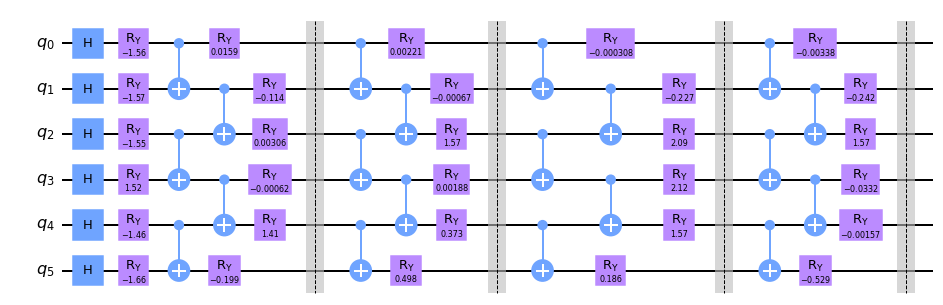

In [13]:
# example of QSC
qc = QNNcircuit_HE_H3(num_qubits, X_test[0], reps_pqc, reps, opt_params2, weight=np.pi)
qc.draw('mpl')

### PES inference

In [14]:
# energy inference
eng1 = infer_energy_PNC(opt_params1, X_test, R)
eng2 = infer_energy_HE(opt_params2, X_test, R)

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:41<00:00,  1.39s/it]


In [15]:
# exact solution
with open('./classical_sol/exact_h3_R4.pickle','rb') as g:
    exact_energy = pickle.load(g)

## Plot results

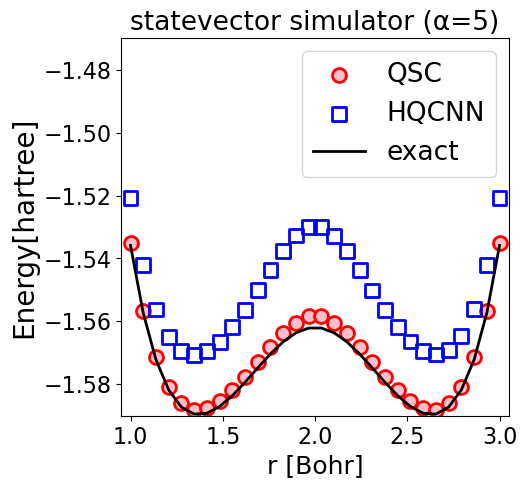

In [16]:
plt.figure(figsize=(5, 5), dpi=100)

x = []
for i in range(len(X_test)):
    x.append(X_test[i][0])


plt.scatter(np.array(x)/Bohr,eng1,marker='o',s=100, facecolor='pink', edgecolors='red',lw=2,label='QSC')
plt.scatter(np.array(x)/Bohr,eng2,marker='s',s=100, facecolor='None', edgecolors='blue',lw=2,label='HQCNN')
plt.plot(np.array(x)/Bohr,exact_energy, c='black',label='exact',lw=2)


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=19)

plt.title('statevector simulator (α=5)',fontsize=19)

plt.xlabel(
    'r [Bohr]',
    fontsize=18,
)
plt.ylabel('Energy[hartree]', fontsize=20)

plt.xlim(0.95,3.05)
plt.xticks( np.arange(1.0, 3.1, 0.5))
plt.ylim(-1.59,-1.47)

plt.show()

In [17]:
deltaE1= []
deltaE2= []
x=[]
for i in range(len(X_test)):
    x.append(X_test[i][0])
    deltaE1.append(np.abs(np.array(eng1)[i][0]-np.array(exact_energy)[i]))
    deltaE2.append(np.abs(np.array(eng2)[i][0]-np.array(exact_energy)[i]))

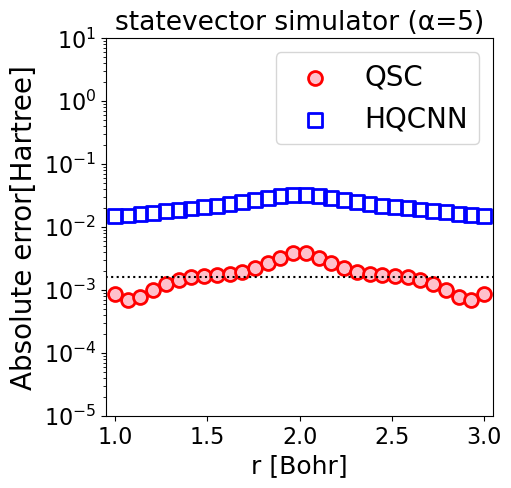

In [18]:
plt.figure(figsize=(5, 5), dpi=100)

#plt.scatter(x,deltaE1,marker='o',s=50,facecolor='None', edgecolors='red',lw=2,label='QSC')
plt.scatter(np.array(x)/Bohr,deltaE1,marker='o',s=100,facecolor='pink', edgecolors='red',lw=2,label='QSC')
plt.scatter(np.array(x)/Bohr,deltaE2,marker='s',s=100,facecolor='None', edgecolors='blue',lw=2,label='HQCNN')
plt.hlines(0.00159,0.8, 3.2, color='black', linestyles='dotted')

plt.xlim(0.8,3.2)
plt.ylim(1E-5,10)
plt.yscale('log')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend(fontsize=20)
plt.xlabel('r [Bohr]', fontsize=18)
plt.ylabel('Absolute error[Hartree]', fontsize=20)

plt.title('statevector simulator (α=5)',fontsize=19)
plt.xlim(0.95,3.05)
plt.xticks( np.arange(1.0, 3.1, 0.5))

plt.show()

In [19]:
import qiskit.tools.jupyter
%qiskit_version_table